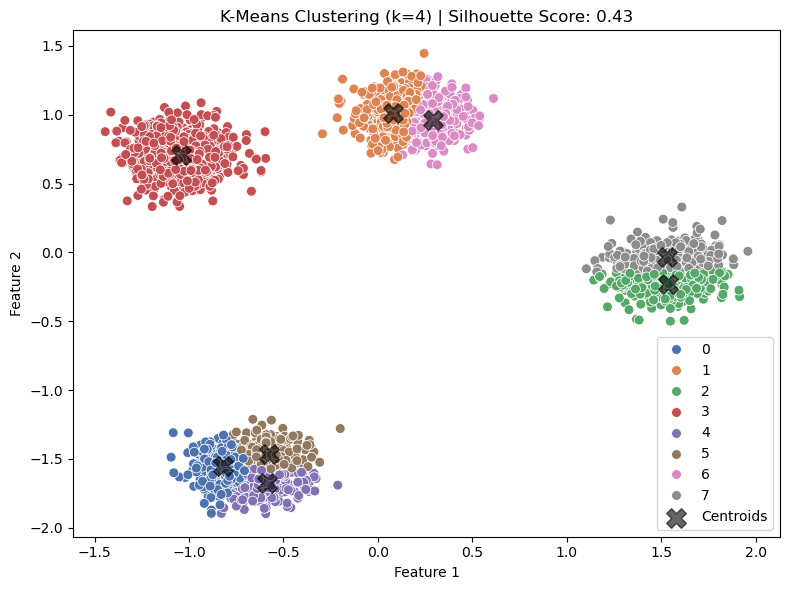

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

demo = 4
# Generate synthetic dataset for clustering demo
X, y_true = make_blobs(n_samples=3000, centers=demo, cluster_std=0.75, random_state=42)

# Standardise features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans  (to overfit make n_clusters=demo*2, to underfit /2)
kmeans = KMeans(n_clusters=demo, random_state=42, n_init='auto')
y_kmeans = kmeans.fit_predict(X_scaled)

# Silhouette Score
sil_score = silhouette_score(X_scaled, y_kmeans)

# Create Dataframe for display
df = pd.DataFrame(X_scaled, columns=["Feature 1", "Feature 2"])
df["Cluster"] = y_kmeans

# Plot the clustered result
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Feature 1", y="Feature 2", hue="Cluster", data=df, palette="deep", s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6, marker="X", label='Centroids')
plt.title(f"K-Means Clustering (k={demo}) | Silhouette Score: {sil_score:.2f}")
plt.legend()
plt.tight_layout()
plt.show()
